In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data_type={
    'product_id' : str,
    'category_id' : str,
    'user_id' : str
}
df_Oct=pd.read_csv('Data 1.csv', dtype=data_type, parse_dates=['event_time'])
df_Nov=pd.read_csv('Data 2.csv', dtype=data_type, parse_dates=['event_time'])

In [3]:
#concatenate both dfs 
df_all=pd.concat([df_Oct,df_Nov], ignore_index=True)
df_all

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07+00:00,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15+00:00,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
...,...,...,...,...,...,...,...,...,...
8738115,2019-11-30 23:59:46+00:00,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295
8738116,2019-11-30 23:59:47+00:00,view,5733064,1487580004832248652,NaN,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95
8738117,2019-11-30 23:59:47+00:00,view,5867785,1487580007835370453,NaN,kims,31.10,572579084,d42865b7-7e04-4038-9be0-a59165625f06
8738118,2019-11-30 23:59:57+00:00,view,5779406,2151191071051219817,NaN,NaN,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063


In [4]:
df_all.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8738120 entries, 0 to 8738119
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     object             
 3   category_id    object             
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        object             
 8   user_session   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(7)
memory usage: 600.0+ MB


In [6]:
#checking null values
df_all.isna().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    8594895
brand            3645290
price                  0
user_id                0
user_session        1450
dtype: int64

In [147]:
#making purchase data frame
df_pur=df_all[df_all['event_type']=='purchase']
df_pur=df_pur[df_pur['price']>=0]
df_pur['user_id'].value_counts()

user_id
557790271    438
546827800    329
549507462    256
566576008    236
473313149    230
            ... 
471259500      1
560982352      1
545911903      1
497113809      1
568124569      1
Name: count, Length: 52523, dtype: int64

In [148]:
#convert datetime
from datetime import datetime
df_pur['event_time'] = pd.to_datetime(df_pur['event_time'])
df_pur['event_time'] = df_pur['event_time'].dt.tz_localize(None)

In [149]:
rfm_columns=['product_id', 'user_id', 'event_time', 'price']
df_rmf=df_pur[rfm_columns]
df_rmf['events']=df_rmf['event_time']
reference_date=pd.to_datetime('2019-12-01')

C:\Users\aslan\AppData\Local\Temp\ipykernel_18924\1025258769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rmf['events']=df_rmf['event_time']


In [150]:
df=df_rmf.groupby('user_id').agg({
    'event_time' : lambda x : (reference_date - x.max()).days,
    'events' : lambda x : x.nunique(),
    'price' : lambda x : x.sum()
})
df

,event_time,events,price
user_id,,,
100557945,21,1,8.72
100787781,15,1,43.86
10079204,24,1,25.81
101281763,0,1,39.90
10280338,9,2,54.83
...,...,...,...
98354430,8,1,56.20
99293243,49,2,46.22
99499363,40,1,17.47


In [151]:
re_col={
    'event_time' : 'Recency',
    'events' : 'Frequency',
    'price' : 'Monetary'
}
df.rename(columns=re_col,inplace=True)
df

,Recency,Frequency,Monetary
user_id,,,
100557945,21,1,8.72
100787781,15,1,43.86
10079204,24,1,25.81
101281763,0,1,39.90
10280338,9,2,54.83
...,...,...,...
98354430,8,1,56.20
99293243,49,2,46.22
99499363,40,1,17.47


In [162]:
r = pd.qcut(df['Recency'], 7, labels=[7,6,5,4,3,2,1])
f = pd.cut(df['Frequency'], bins=[0,1,5,10,20,float('inf')], labels=[1,2,3,4,5])
m = pd.cut(df['Monetary'], bins=[0,20,50,100,200,500,1000,float('inf')], labels=[1,2,3,4,5,6,7])

In [163]:
rfm=df.assign(R=r.values, F=f.values, M=m.values)
rfm

,Recency,Frequency,Monetary,R,F,M
user_id,,,,,,
100557945,21,1,8.72,4,1,1
100787781,15,1,43.86,5,1,2
10079204,24,1,25.81,4,1,2
101281763,0,1,39.90,7,1,2
10280338,9,2,54.83,6,2,3
...,...,...,...,...,...,...
98354430,8,1,56.20,6,1,3
99293243,49,2,46.22,2,2,2
99499363,40,1,17.47,2,1,1


In [164]:
rfm['R'].value_counts()

R
6    8086
7    7852
1    7503
5    7454
3    7418
2    7398
4    6812
Name: count, dtype: int64

In [165]:
rfm['F'].value_counts()

F
1    43096
2     9192
3      199
4       27
5        9
Name: count, dtype: int64

In [166]:
rfm['M'].value_counts()

M
2    19624
1    16438
3    10213
4     4551
5     1554
6      130
7       13
Name: count, dtype: int64

In [167]:
rfm['rfm_group'] = rfm[['R', 'F', 'M']].apply(lambda x : '_'.join(x.astype(str)), axis=1)
rfm['rfm_score'] = rfm[['R', 'F', 'M']].sum(axis=1)
rfm.sort_values(by='rfm_score',ascending=False)

,Recency,Frequency,Monetary,R,F,M,rfm_group,rfm_score
user_id,,,,,,,,
150318419,1,60,1645.97,7,5,7,7_5_7,19
531900924,2,44,1329.45,7,5,7,7_5_7,19
247216055,1,26,919.50,7,5,6,7_5_6,18
471197852,1,39,691.18,7,5,6,7_5_6,18
396059467,5,22,739.94,7,5,6,7_5_6,18
...,...,...,...,...,...,...,...,...
519977862,58,1,6.16,1,1,1,1_1_1,3
423066528,52,1,19.82,1,1,1,1_1_1,3
519989913,53,1,19.28,1,1,1,1_1_1,3


In [168]:
rfm['rfm_score'].value_counts()

rfm_score
9     6872
8     6546
5     6529
7     6513
6     6329
4     5467
10    5093
11    2995
3     2729
12    1952
13    1010
14     348
15      95
16      30
17       8
18       5
19       2
Name: count, dtype: int64

In [233]:
rfm=rfm.drop(columns='index')
rfm

,user_id,Recency,Frequency,Monetary,R,F,M,rfm_group,rfm_score
0,100557945,21,1,8.72,4,1,1,4_1_1,6
1,100787781,15,1,43.86,5,1,2,5_1_2,8
2,10079204,24,1,25.81,4,1,2,4_1_2,7
3,101281763,0,1,39.90,7,1,2,7_1_2,10
4,10280338,9,2,54.83,6,2,3,6_2_3,11
...,...,...,...,...,...,...,...,...,...
52518,98354430,8,1,56.20,6,1,3,6_1_3,10
52519,99293243,49,2,46.22,2,2,2,2_2_2,6
52520,99499363,40,1,17.47,2,1,1,2_1_1,4
52521,99678913,47,1,9.36,2,1,1,2_1_1,4


In [288]:
rfm_clyster=rfm[['R','F','M']]
rfm_clyster=rfm_clyster.reset_index()
rfm_clyster

,index,R,F,M
0,0,4,1,1
1,1,5,1,2
2,2,4,1,2
3,3,7,1,2
4,4,6,2,3
...,...,...,...,...
52518,52518,6,1,3
52519,52519,2,2,2
52520,52520,2,1,1
52521,52521,2,1,1


C:\Users\aslan\AppData\Local\Temp\ipykernel_18924\2742426167.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm.Frequency,kde=False)


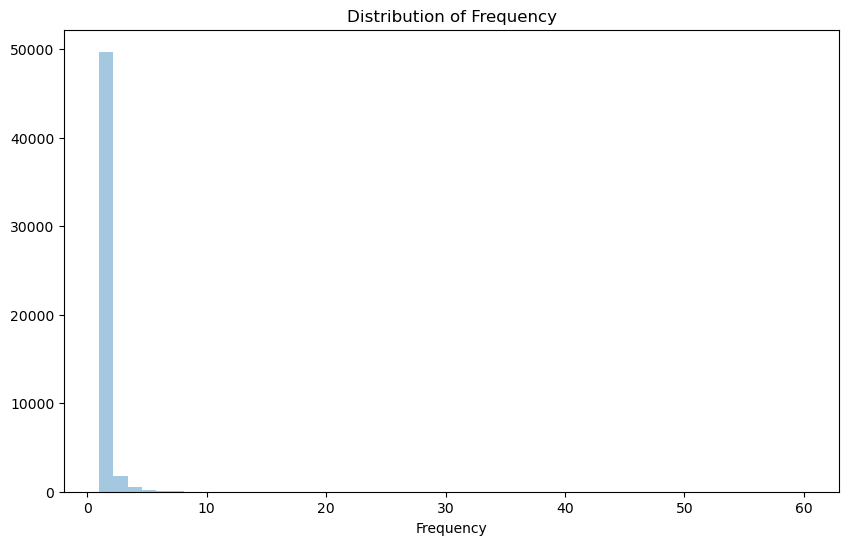

In [319]:
plt.figure(figsize=(10, 6))

sns.distplot(rfm.Frequency,kde=False)

plt.xlabel('Frequency')
plt.title('Distribution of Frequency')
# plt.xlim(0,5)
plt.show()

C:\Users\aslan\AppData\Local\Temp\ipykernel_18924\3469332510.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm.Monetary,kde=False)


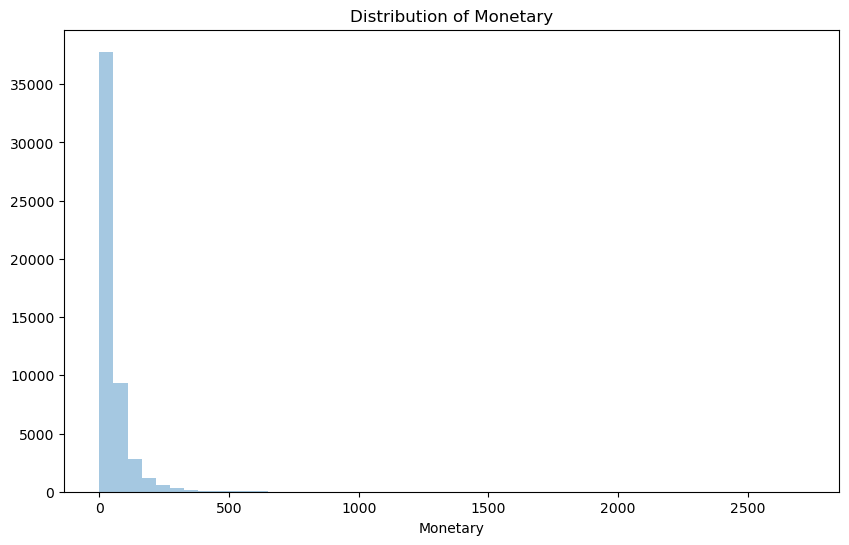

In [320]:
plt.figure(figsize=(10, 6))

sns.distplot(rfm.Monetary,kde=False)

plt.xlabel('Monetary')
plt.title('Distribution of Monetary')
plt.show()

C:\Users\aslan\AppData\Local\Temp\ipykernel_18924\3522852802.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm.Recency,kde=False, bins=10)


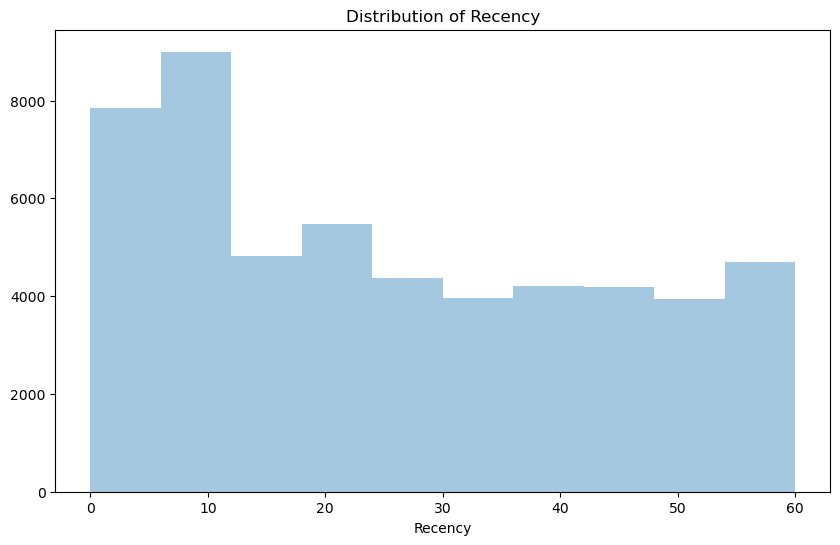

In [308]:
plt.figure(figsize=(10, 6))

sns.distplot(rfm.Recency,kde=False, bins=10)

plt.xlabel('Recency')
plt.title('Distribution of Recency')
plt.show()

C:\Users\aslan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


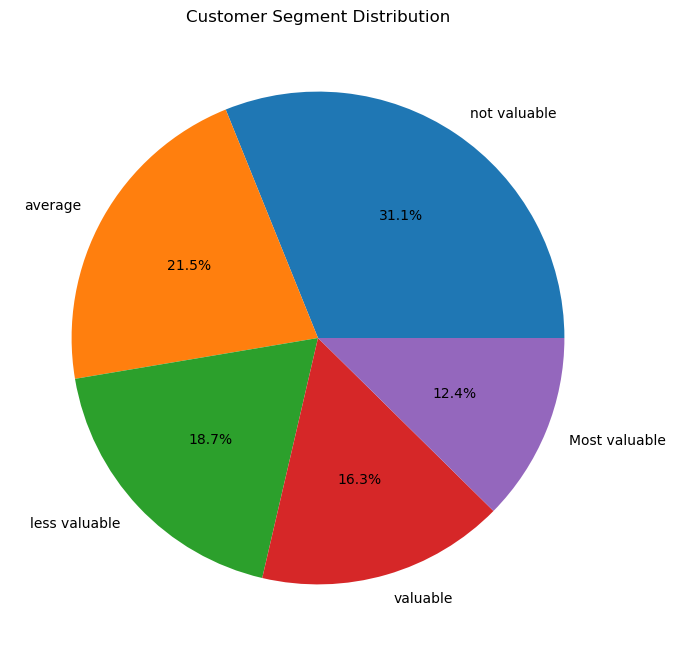

In [293]:
from sklearn.cluster import KMeans

X = rfm_clyster[['R', 'F', 'M']]

# Fit KMeans clustering model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_
# Verify if the 'Cluster' column was added successfully
if 'Cluster' in df.columns:
    segment_names = ['not valuable', 'average', 'less valuable', 'valuable', 'Most valuable']
    
    # Analyze segment distribution
    segment_distribution = df['Cluster'].value_counts(normalize=True)

    # Visualize segment distribution
    segment_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Customer Segment Distribution', labels=segment_names)
    plt.ylabel('')
    plt.show()
else:
    print("Error: Cluster column not found in DataFrame.")

In [282]:
top_ten_r=rfm.sort_values(by='Recency')
print(f"Number of last day buyers: {top_ten_r[top_ten_r['Recency']==top_ten_r['Recency'].min()].count()[0]}")

Number of last day buyers: 1419


In [281]:
top_ten_f=rfm.sort_values(by='Frequency',ascending=False).head(10)
print(f"Number of most frequent buyers: {top_ten_f['Frequency'].value_counts()}")

Number of most frequent buyers: Frequency
26    3
60    1
44    1
39    1
28    1
25    1
22    1
20    1
Name: count, dtype: int64


In [280]:
top_ten_m=rfm.sort_values(by='Monetary',ascending=False).head(10)
print(f"Number of most profitable buyers: {top_ten_f['Monetary'].value_counts()}")

Number of most profitable buyers: Monetary
1645.97    1
1329.45    1
691.18     1
859.32     1
919.50     1
927.01     1
500.00     1
451.95     1
739.94     1
613.69     1
Name: count, dtype: int64


In [169]:
top_ten_users=rfm.sort_values(by='rfm_score',ascending=False).reset_index().head(10)
top_ten_users

,user_id,Recency,Frequency,Monetary,R,F,M,rfm_group,rfm_score
0,150318419,1,60,1645.97,7,5,7,7_5_7,19
1,531900924,2,44,1329.45,7,5,7,7_5_7,19
2,247216055,1,26,919.50,7,5,6,7_5_6,18
3,471197852,1,39,691.18,7,5,6,7_5_6,18
4,396059467,5,22,739.94,7,5,6,7_5_6,18
5,443045778,1,28,859.32,7,5,6,7_5_6,18
6,400911344,1,11,1015.47,7,4,7,7_4_7,18
7,525207529,0,15,615.04,7,4,6,7_4_6,17
8,549464624,1,25,451.95,7,5,5,7_5_5,17
9,394666389,1,11,529.42,7,4,6,7_4_6,17


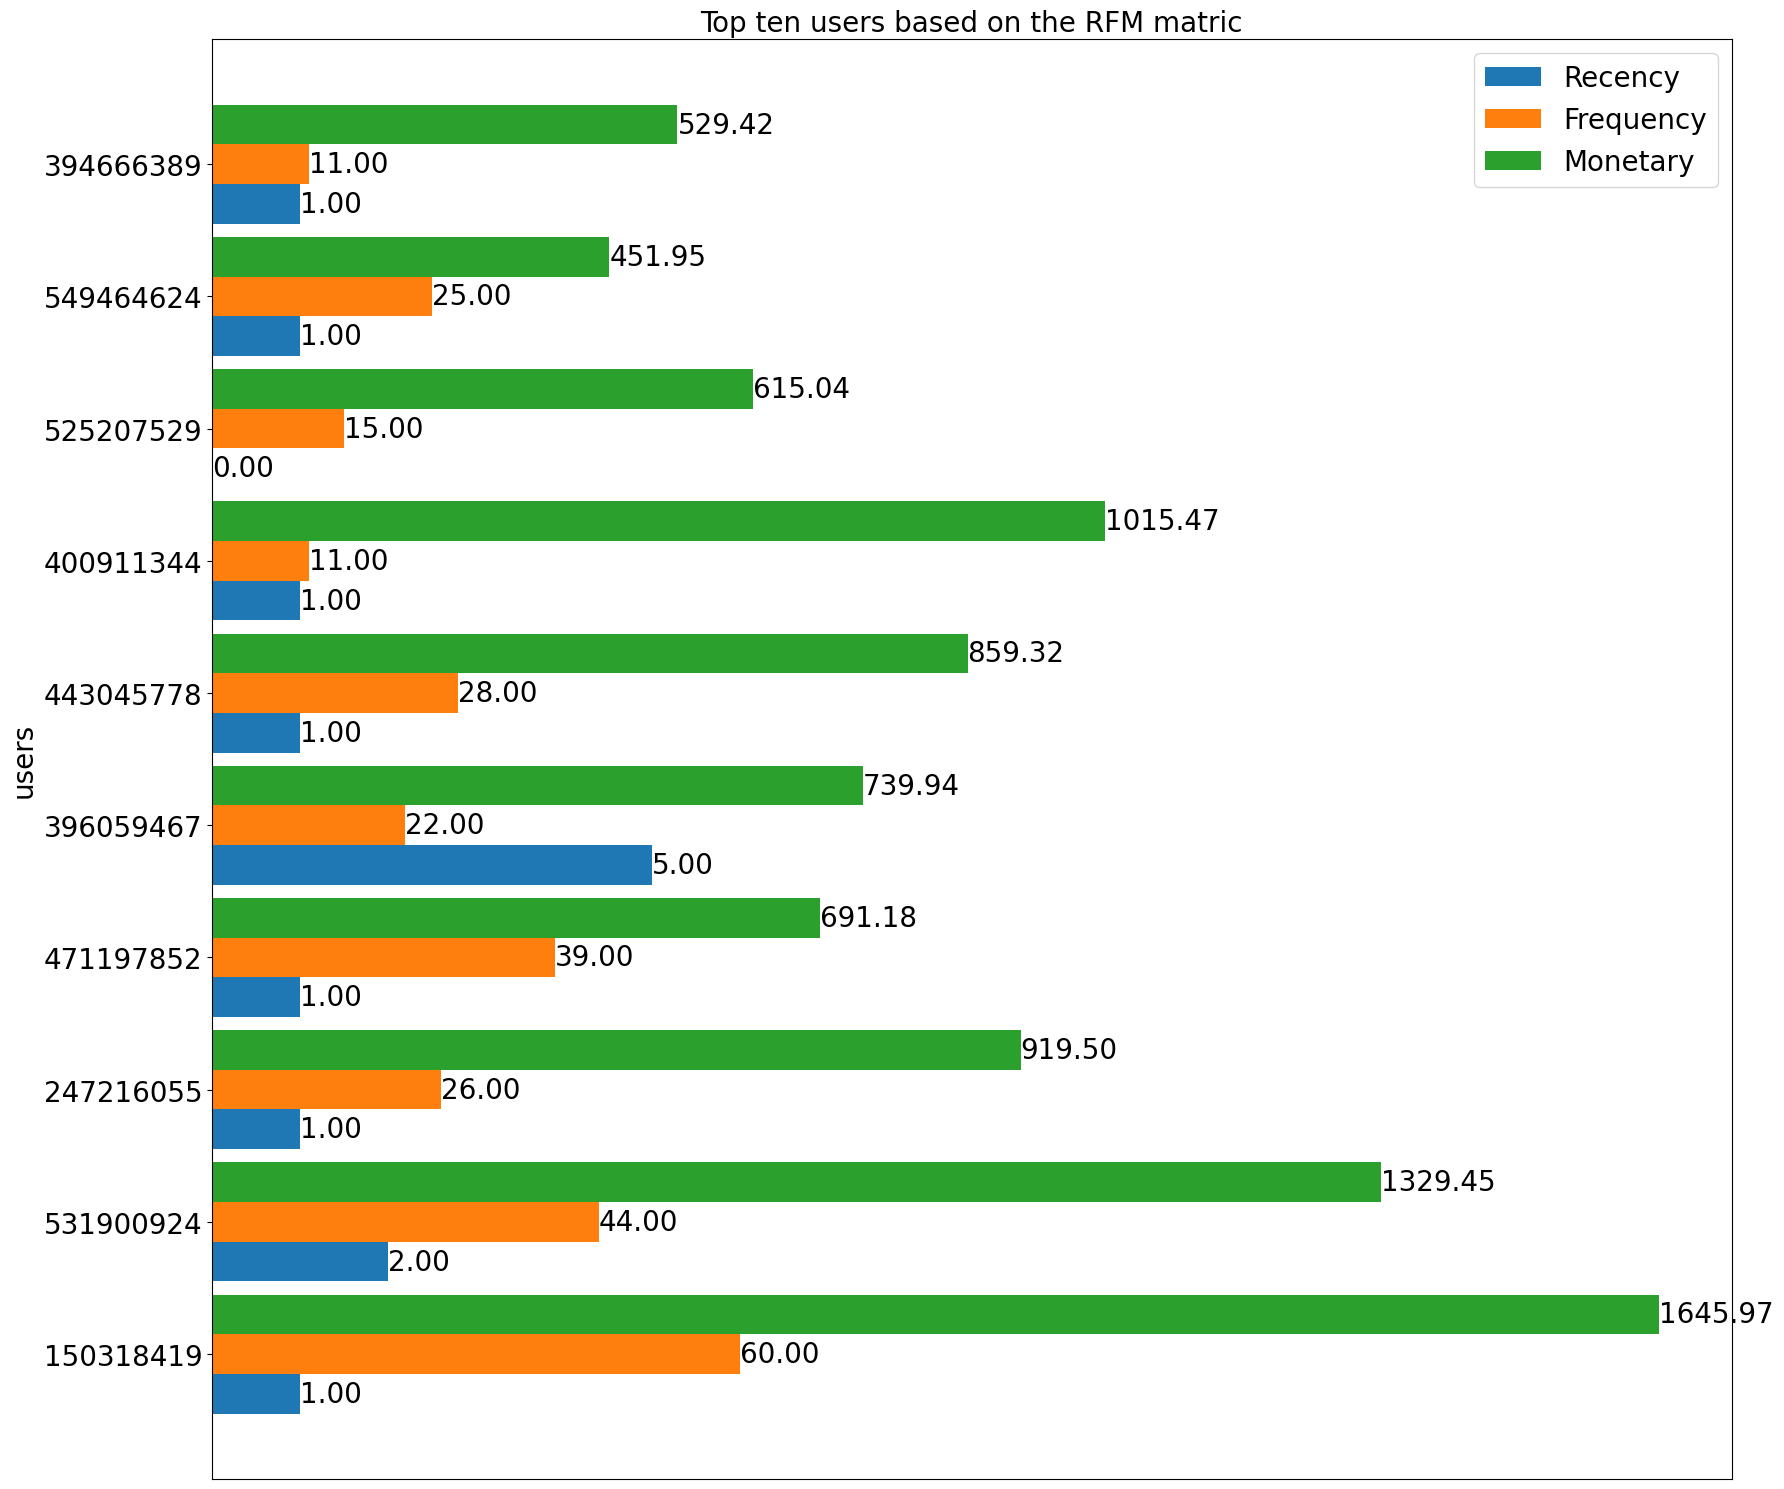

In [217]:
# Sample data
users = top_ten_users.user_id.tolist()
rec = top_ten_users.Recency.tolist()
fre = top_ten_users.Frequency.tolist()
mon = top_ten_users.Monetary.tolist()

#scaling
fre_scaled = [x/10 for x in fre]
mon_scaled = [x/100 for x in mon]

# Define bar height
bar_hight = 0.3

# Set x locations for the groups
y = np.arange(len(users))

# Set the size and font of the plot
plt.figure(figsize=(18, 15))
plt.xlabel('Values', fontsize=14)       # Increase font size of x-axis label

# Plotting the bars
b1=plt.barh(y - bar_hight, rec, height=bar_hight, label='Recency')
b2=plt.barh(y, fre_scaled, height=bar_hight, label='Frequency')
b3=plt.barh(y + bar_hight, mon_scaled, height=bar_hight, label='Monetary')

# Adding labels and title
plt.ylabel('users', fontsize=20)
plt.xlabel('', fontsize=20)
plt.title('Top ten users based on the RFM matric', fontsize=20)
plt.yticks(y, users, fontsize=20)

# Adding legend
plt.legend(fontsize=20)
plt.xticks([])

#adding values to plot
def add_values(bars,factor):
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height() / 2, '%.2f' % (width*factor), ha='left', va='center', fontsize=20)

# Add values for each set of bars
add_values(b1,1)
add_values(b2,10)
add_values(b3,100)

# Show plot
plt.tight_layout()
plt.show()


In [284]:
rfm_cluster=rfm[['Recency','Frequency','Monetary']]
rfm_cluster=rfm_cluster.reset_index()
rfm_cluster

,index,Recency,Frequency,Monetary
0,0,21,1,8.72
1,1,15,1,43.86
2,2,24,1,25.81
3,3,0,1,39.90
4,4,9,2,54.83
...,...,...,...,...
52518,52518,8,1,56.20
52519,52519,49,2,46.22
52520,52520,40,1,17.47
52521,52521,47,1,9.36


C:\Users\aslan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


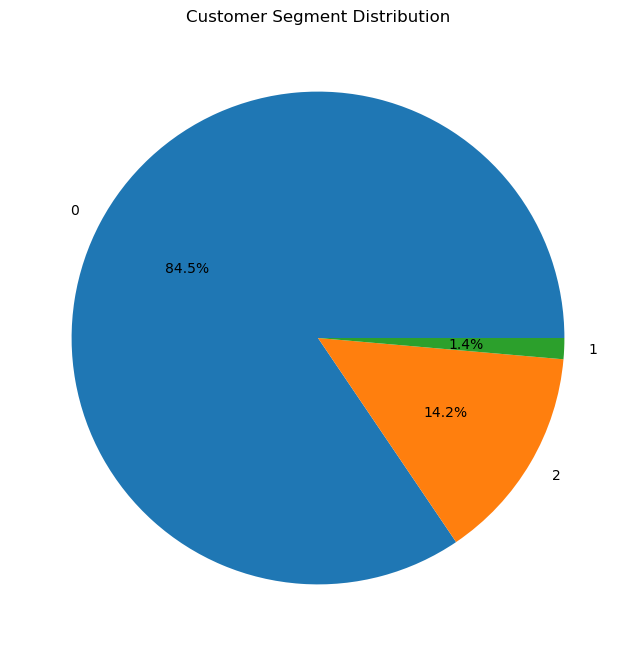

In [286]:
from sklearn.cluster import KMeans

X = rfm_cluster[['Recency', 'Frequency', 'Monetary']]

# Fit KMeans clustering model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_
# Verify if the 'Cluster' column was added successfully
if 'Cluster' in df.columns:
    # Analyze segment distribution
    segment_distribution = df['Cluster'].value_counts(normalize=True)

    # Visualize segment distribution
    segment_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Customer Segment Distribution')
    plt.ylabel('')
    plt.show()
else:
    print("Error: Cluster column not found in DataFrame.")